# Hospital Queue Simulator

## Question
We have an ICU & ward room with some beds.</br>
First, if there is an empty bed in the ICU, the patient goes to the ICU.</br>
Then the patient stays in the ICU, after a few days, if there is an empty bed in the ward, surgery is performed.</br>
After the surgery, he goes to the ward and is released after a while.</br>
</br>
## Hints
There are always patients to be admitted to the ICU room.</br>
If there is no empty bed in the ward, we can not operate on anyone, so the number of ICU patients will not decrease and the patient will have to wait.</br>
At the beginning of the patient's admission to the ward or ICU, it is determined that the patient should stay here for at least a few days.

In [6]:
from typing import Tuple
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib qt

In [7]:
# BEDS[x] -> (WARD_BEDS, ICU_BEDS)
BEDS = [
    (7, 10),
    (8, 10),
    (10, 10),
    (12, 10),
]

TOTAL_DAYS = 3 * 30

In [8]:
def get_random_days(room: str) -> int:
    """return random days for icu, ward, etc.

    Args:
        room (str): room of hospital

    Returns:
        int: a random day for this room
    """
    if room == 'icu':
        return np.random.randint(1, 8)
    if room == 'ward':
        return np.random.randint(1, 8)
    return np.random.randint(1, 8)


def empty_bed(room: dict) -> bool:
    """check, have empty bed in this room

    Args:
        room (dict): room

    Returns:
        bool: if have empty bed in this room return True, else return False
    """
    return 0 in room.values()


def add_to_ward(ward: dict) -> None:
    """add one patient to the ward room
    we are sure, there is an empty bed in this ward room

    Args:
        ward (dict): ward dictionary
    """
    for key, value in ward.items():
        if value == 0:
            ward[key] = get_random_days('ward')
            return

In [9]:
def calculate_performance(bed: tuple) -> Tuple[list]:
    """calculate performance of hospital with this bed count

    Args:
        bed (tuple): ward and icu beds

    Returns:
        Tuple[list]: surgery and wasted list
    """
    ward_beds, icu_beds = bed
    icu = {key: 0 for key in range(icu_beds)}  # empty icu beds
    ward = {key: 0 for key in range(ward_beds)}  # empty ward beds
    # number of patients waiting in ICU because there is no bed in ward room.
    wasted = np.zeros(TOTAL_DAYS)
    # number of patients went under surgery and moved from ICU to ward.
    surgery = np.zeros(TOTAL_DAYS)

    # each iteration, simulating one day in the hospital
    for day in range(TOTAL_DAYS):
        # if we have an empty bed in ICU, add a patient there.
        for key, value in icu.items():
            if value == 0:
                icu[key] = get_random_days('icu')

        # check the ICU patients and prcess them.
        for key, value in icu.items():
            if value > 1:  # one day has passed
                icu[key] -= 1
            else:  # we have a person for surgery
                # there is an empty bed in ward, perform surgery and move the patient to ward
                if empty_bed(ward):
                    surgery[day] += 1
                    icu[key] = 0
                    add_to_ward(ward)
                # there are no empty beds in ward, so the patient needs to wait!
                else:
                    wasted[day] += 1

        # process the ward, one day has passed
        for key, value in ward.items():
            if value >= 1:
                ward[key] -= 1

    return surgery, wasted

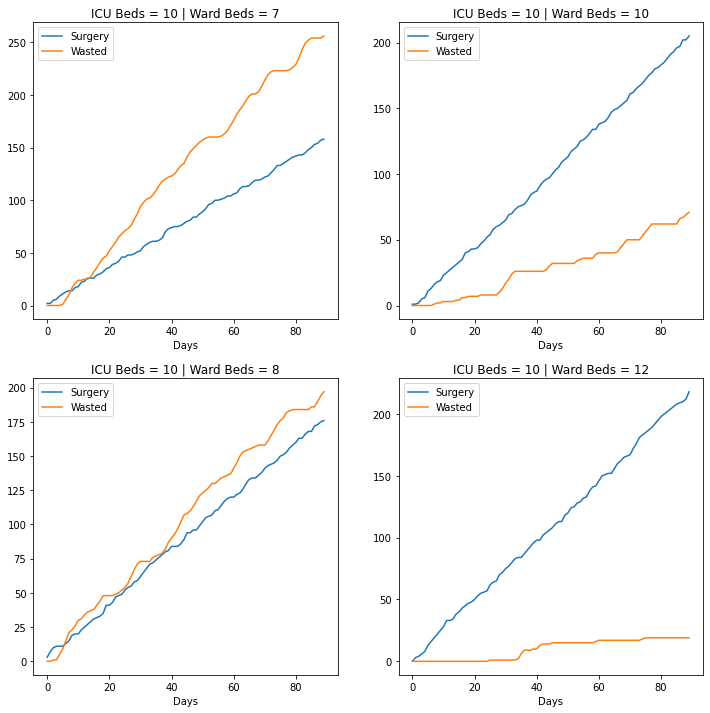

In [10]:
chart_counter = 0
chart_size = (12, 12)
fig, ax = plt.subplots(nrows=2, ncols=int(len(BEDS)/2), figsize=chart_size)

for beds in BEDS:
    # draw chart for this ICU & WARD bed count pair
    surgery_output, wasted_output = calculate_performance(beds)
    current_ax = ax[chart_counter % 2][int(chart_counter / 2)]
    # cumsum: cumulative sums
    current_ax.plot(np.cumsum(surgery_output))
    # cumsum: cumulative sums
    current_ax.plot(np.cumsum(wasted_output))
    current_ax.set_xlabel("Days")
    current_ax.set_title(
        f"ICU Beds = {beds[1]} | Ward Beds = {beds[0]}"
    )
    current_ax.legend(("Surgery", "Wasted"))

    chart_counter += 1